<a href="https://colab.research.google.com/github/Mohan-vikas/earthquake-prediction/blob/main/Another_copy_of_rnd_2_alg_combain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LMT and GBM Ensemble

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
# Load your seismic data (features) and labels
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/database.csv')
data['Depth'] = data['Depth'].fillna(10)
data.to_csv('data.csv', index=False)
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


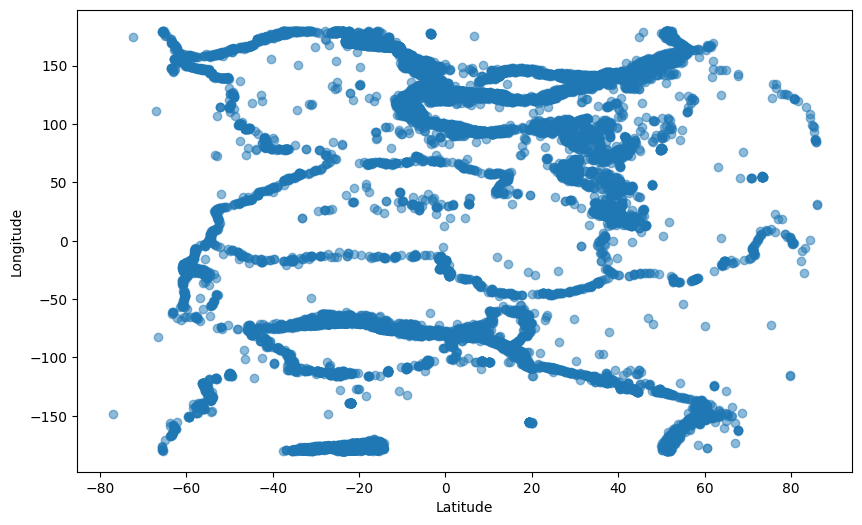

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with columns 'Latitude' and 'Longitude'
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a scatter plot
plt.scatter(data['Latitude'], data['Longitude'], alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()

ELM and GBM Ensemble

In [ ]:
X = data[['Latitude', 'Longitude']]
# y = data[['Depth', 'Magnitude','gap','nst','rms']]
y = data[['Depth', 'Magnitude',]]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [ ]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Use Gaussian Random Projection as a simplified ELM-like method
elm = GaussianRandomProjection(n_components=2, random_state=1)
X_train_proj = elm.fit_transform(X_train)
X_test_proj = elm.transform(X_test)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor
# Train a Gradient Boosting Regressor (GBR) model for Depth prediction
gbr_depth = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=400)
gbr_depth.fit(X_train_proj, y_train['Depth'])

# Make predictions for Depth
depth_preds = gbr_depth.predict(X_test_proj)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor

# ...

# Train a Gradient Boosting Regressor (GBR) model for Depth prediction
gbr_depth = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=130)
gbr_depth.fit(X_train_proj, y_train['Depth'])

# Make predictions for Depth
depth_preds = gbr_depth.predict(X_test_proj)

# Train another GBR model for Magnitude prediction
gbr_magnitude = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=3)
gbr_magnitude.fit(X_train_proj, y_train['Magnitude'])

# Make predictions for Magnitude
magnitude_preds = gbr_magnitude.predict(X_test_proj)

In [ ]:
# Calculate statistics of 'Depth' and 'Magnitude' to set initial thresholds
depth_mean = y_test['Depth'].mean()
depth_std = y_test['Depth'].std()

magnitude_mean = y_test['Magnitude'].mean()
magnitude_std = y_test['Magnitude'].std()

# Set initial thresholds as one standard deviation from the mean
threshold_depth = depth_std
threshold_magnitude = magnitude_std

In [ ]:
# Classify predictions
combined_correct = (abs(y_test['Depth'] - depth_preds) <= threshold_depth) & \
                   (abs(y_test['Magnitude'] - magnitude_preds) <= threshold_magnitude)

# Calculate the combined accuracy
combined_accuracy = sum(combined_correct) / len(combined_correct)

print(f'Ensemble Accuracy of ELLM and GBM: {combined_accuracy * 100:.2f}%')

Ensemble Accuracy: 81.42%


SVM And Random Forest Ensemble

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create and initialize Random Forest Regressor models for Depth and Magnitude
rf_depth = RandomForestRegressor(n_estimators=100, random_state=52)
rf_magnitude = RandomForestRegressor(n_estimators=100, random_state=52)

# Create and initialize Support Vector Machine (SVM) Regressor models for Depth and Magnitude
svm_depth = SVR(kernel='linear')
svm_magnitude = SVR(kernel='linear')

# Train Random Forest models
rf_depth.fit(X_train_proj, y_train['Depth'])
rf_magnitude.fit(X_train_proj, y_train['Magnitude'])

# Train SVM models
svm_depth.fit(X_train_proj, y_train['Depth'])
svm_magnitude.fit(X_train_proj, y_train['Magnitude'])

# Make predictions for Depth and Magnitude using both models
depth_rf_preds = rf_depth.predict(X_test_proj)
magnitude_rf_preds = rf_magnitude.predict(X_test_proj)

depth_svm_preds = svm_depth.predict(X_test_proj)
magnitude_svm_preds = svm_magnitude.predict(X_test_proj)

# Combine predictions (simple average)
depth_combined_preds = (depth_rf_preds + depth_svm_preds) / 2
magnitude_combined_preds = (magnitude_rf_preds + magnitude_svm_preds) / 2

# Evaluate the combined predictions for Depth and Magnitude
depth_rmse = mean_squared_error(y_test['Depth'], depth_combined_preds, squared=False)
magnitude_rmse = mean_squared_error(y_test['Magnitude'], magnitude_combined_preds, squared=False)

# Print the RMSE for Depth and Magnitude
print(f'Combined Depth RMSE: {depth_rmse:.2f}')
print(f'Combined Magnitude RMSE: {magnitude_rmse:.2f}')

# Calculate accuracy using the previously defined thresholds
combined_correct = (abs(y_test['Depth'] - depth_combined_preds) <= threshold_depth) & \
                   (abs(y_test['Magnitude'] - magnitude_combined_preds) <= threshold_magnitude)

combined_accuracy = sum(combined_correct) / len(combined_correct)

print(f'Ensemble Accuracy Of SVM and Random Forest: {combined_accuracy * 100:.2f}%')


Combined Depth RMSE: 81.08
Combined Magnitude RMSE: 0.43
Ensemble Accuracy Of SVM and Random Forest: 74.89%


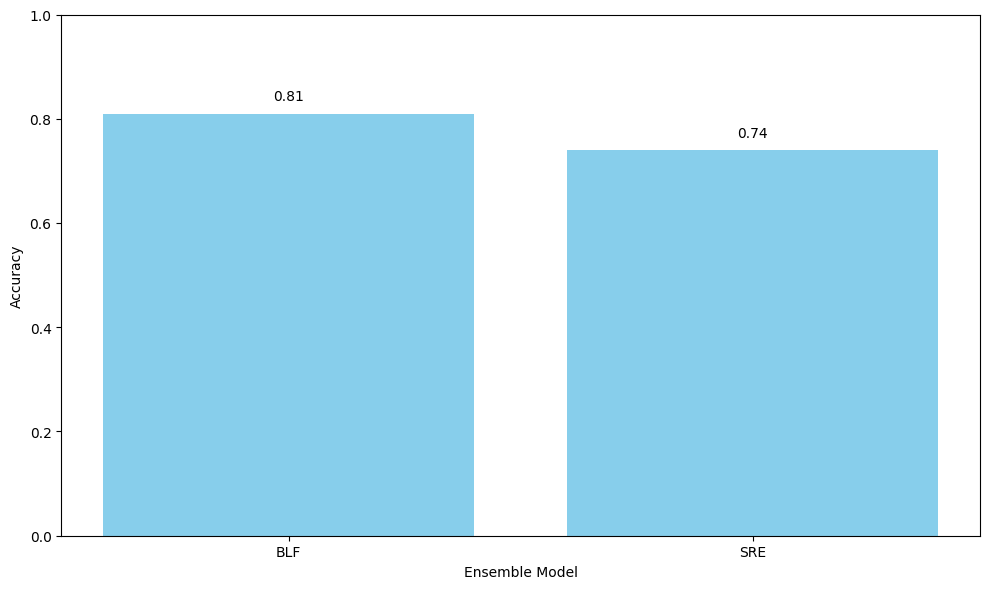

In [ ]:
import matplotlib.pyplot as plt

# Define model/experiment names and their corresponding accuracy scores
models = ['BLF', 'SRE']
accuracies = [0.81, 0.74]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Ensemble Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit (0 to 1 for accuracy)

# Display the accuracy scores on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
